# Table of Contents: 
---
1. Getting Jupyter Ready 
2. Reading the data 
3. Data Cleaning & Manipulation 
4. Client Information
5. Defaulter Information
6. Preparing the data
7. Regression Analysis 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Getting Jupyter ready

---

### Import Python Libraries:

In [781]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore')
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Format tables:

In [782]:
%%html
<style>
table {float:left}
</style>

### Supress Warnings:

In [783]:
import warnings
warnings.filterwarnings('ignore')

### Adjust Jupyer Views:

In [784]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Reading the data

---

In [785]:
df = pd.read_csv ('application_train.csv')
df.head()

,SK_ID_CURR,Unnamed: 1,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET
0,100002,NaN,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1
1,100003,NaN,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0
2,100004,NaN,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0
3,100006,NaN,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0
4,100007,NaN,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0


### Inspect Data 

In [786]:
print("Dataframe shape:", df.shape)

Dataframe shape: (307511, 37)


In [787]:
print("Dataframe size:", df.size)

Dataframe size: 11377907


In [788]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   Unnamed: 1                   0 non-null       float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [789]:
df.describe()

,SK_ID_CURR,Unnamed: 1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
count,307511.000000,0.0,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.080729
std,102790.175348,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.272419
min,100002.000000,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,NaN,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Cleaning & Manipulation
---

### Identifying the null columns

In [790]:
#check how many null values in each column
df.isnull().sum()

SK_ID_CURR                          0
Unnamed: 1                     307511
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [791]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
Unnamed: 1                     100.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

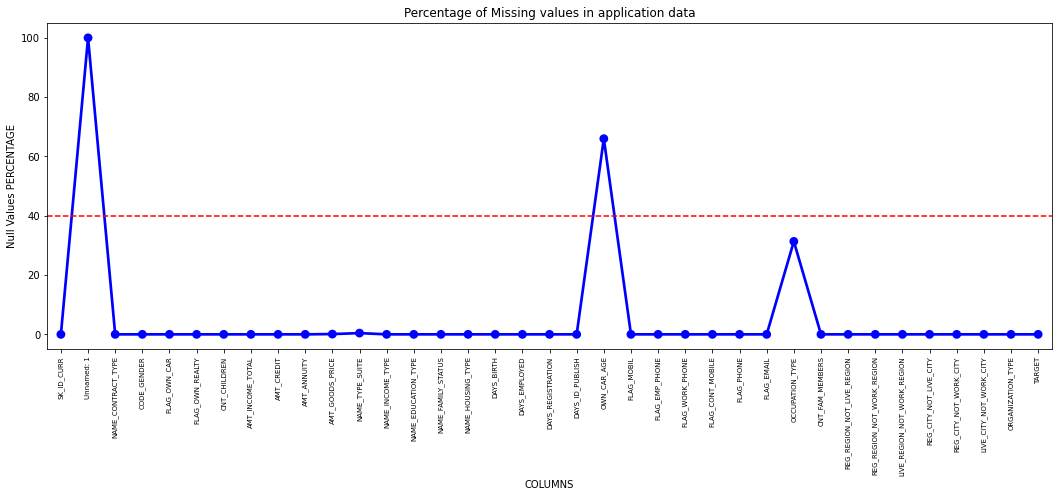

In [792]:
null_applicationDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()


### Delete Unnecessary Columns in df


In [793]:
df = df.drop("Unnamed: 1",axis=1)

In [794]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

### Data Type Conversion
---

In [795]:
# inspecting the column types if they are in correct data type using the above result.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

>Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.

In [796]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION'
                      ]
for col in categorical_columns:
    df[col] =pd.Categorical(df[col])

In [797]:
# inspecting the column types if the above conversion is reflected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   NAME_CONTRACT_TYPE           307511 non-null  category
 2   CODE_GENDER                  307511 non-null  category
 3   FLAG_OWN_CAR                 307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null



### Cleaning


In [798]:
# checking the null value % of each column in df dataframe
round(df.isnull().sum() / df.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                31.35
C

**NAME_TYPE_SUITE** <br>

Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:

In [799]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [800]:
df['NAME_TYPE_SUITE'].fillna((df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

**OCCUPATION_TYPE** <br>

---
Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

In [801]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

---
Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [802]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
C

>We still have few null values in the columns: AMT_GOODS_PRICE. <br> We can ignore as this percentage is very less.

Impute AMT_ANNUITY with median as the distribution is greatly skewed:



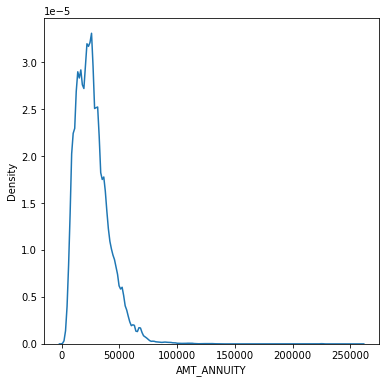

In [803]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['AMT_ANNUITY'])
plt.show()

> There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [804]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(),inplace = True)

Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:

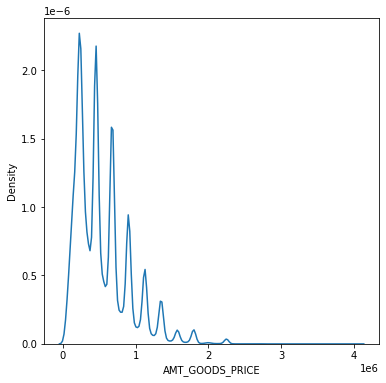

In [805]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['AMT_GOODS_PRICE'][pd.notnull(df['AMT_GOODS_PRICE'])])
plt.show()

There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.

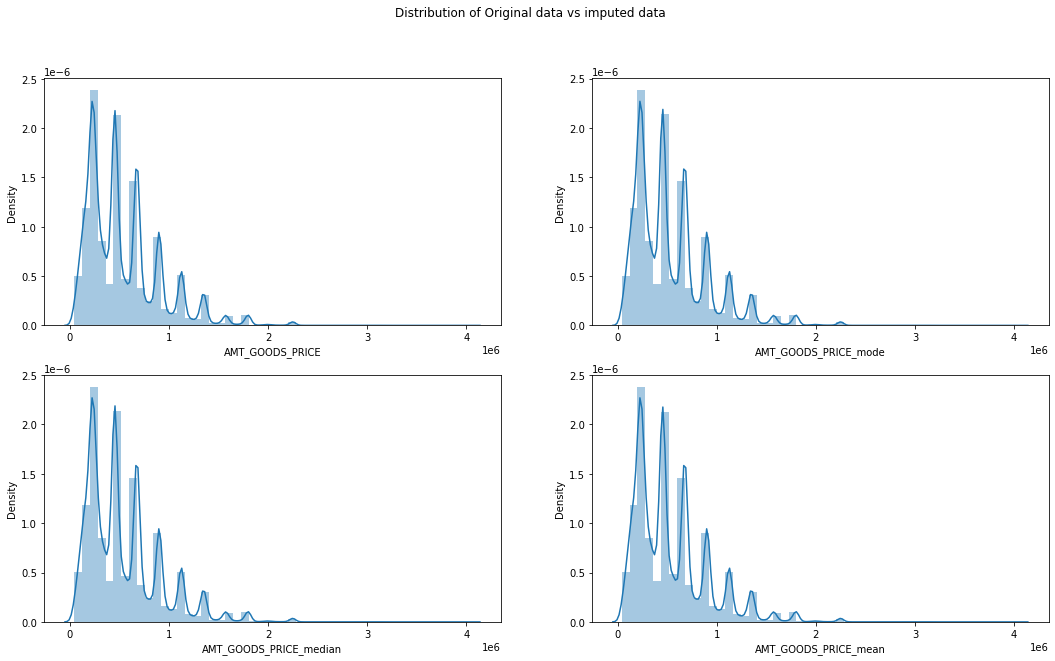

In [806]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(df['AMT_GOODS_PRICE'][pd.notnull(df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

> The original distribution is closer with the distribution of data imputed with mode in this case



In [807]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [808]:
len (df[(df['OWN_CAR_AGE'].isnull()) & (df['FLAG_OWN_CAR']=='Y')])

5

> Very few number of records where the client owns a car and the age of the car is null, therefore, it is more likely that the nulls in **OWN_CAR_AGE** are for clients who don't own a car

In [809]:
# replacing na values in college with No college
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(0)

In [810]:
# replacing na values in college with No college
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(0)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
 
 ## Standardize Values
 ---

In [811]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    df[col] = abs(df[col])

In [812]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [813]:
df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

> We see that more than 50% loan applicants have income amount in the range of 100K-200K. <br>
Almost 92% loan applicants have income less than 300K

In [814]:
# Creating bins for Credit amount
df['AMT_CREDIT']=df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [815]:
df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

> We can see that more than 16% loan applicants have taken loan which amounts to more than 1M.

In [816]:
# Creating bins for Age
df['AGE'] = df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

df['AGE_GROUP']=pd.cut(df['AGE'],bins=bins,labels=slots)

In [817]:
#checking the binning of data and % of data in each category
df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

> 31% loan applicants have age above 50 years. <br> More than 55% of loan applicants have age over 40 years.

In [818]:
# Creating bins for Employement Time
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df['EMPLOYMENT_YEAR']=pd.cut(df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [819]:
#checking the binning of data and % of data in each category
df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

> More than 55% of the loan applicants have work experience within 0-5 years and <br>
almost 80% of them have less than 10 years of work experience

In [820]:
#Checking the number of unique values each column possess to identify categorical columns
df.nunique().sort_values()

FLAG_MOBIL                          2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_WORK_PHONE                     2
REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
FLAG_OWN_REALTY                     2
FLAG_OWN_CAR                        2
NAME_CONTRACT_TYPE                  2
REG_CITY_NOT_WORK_CITY              2
FLAG_EMP_PHONE                      2
CODE_GENDER                         3
AGE_GROUP                           5
NAME_EDUCATION_TYPE                 5
EMPLOYMENT_YEAR                     6
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_CREDIT_RANGE                   11
AMT_INCOME_RANGE                   11
CNT_CHILDREN

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Outliers
---

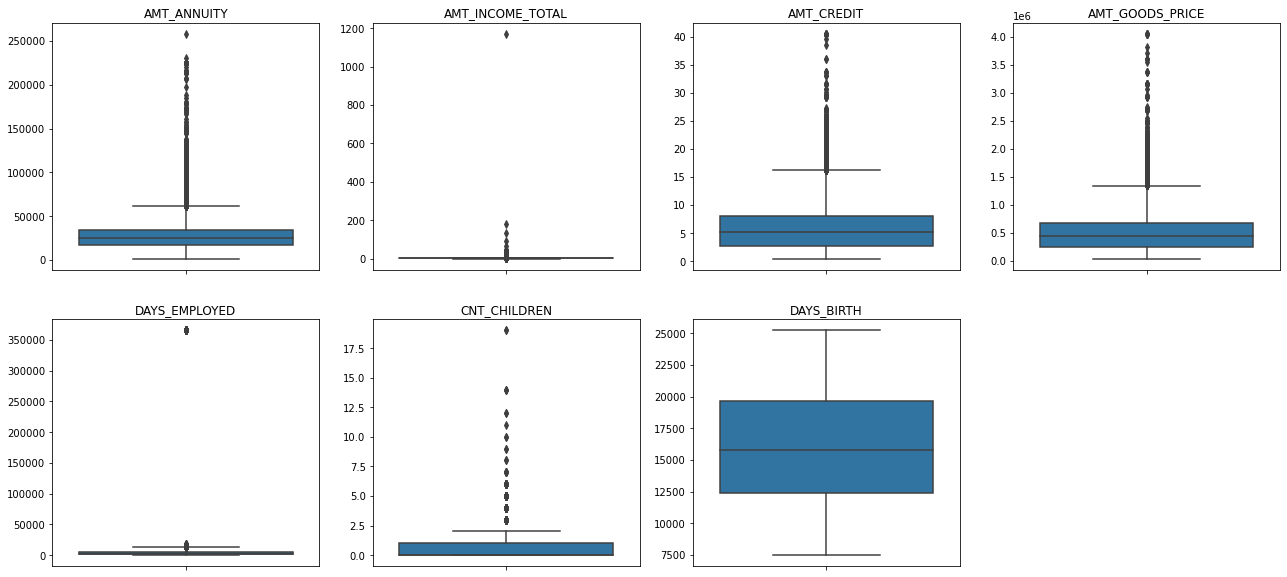

In [821]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

>Removing outliers from AMT_ANNUITY, AMT_CREDIT, and AMT_GOODS_PRICE would result in too much of the data being lost. <br>
For COUNT_CHILDREN anything above 7 children is likely an error, and can be classified as outliers as very few clients have more than 7 kids <br> 
AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others. <br>
DAYS_BIRTH has no outliers which means the data available is reliable. <br>
DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry. We can see that values above 50000 are clearly outliers.

We can see the stats for these columns below as well.



In [822]:
df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000
mean,27108.487841,1.687979,5.990260,5.383163e+05,16036.995067,0.417052,67724.742149
std,14493.461065,2.371231,4.024908,3.692890e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


### Dealing with non-null values

Now that we know more about our dataset and columns with outliers, let's write a function that's going to deal with these for us


>Removing outliers from **AMT_GOODS_PRICE** would result in too much of the data being lost

In [823]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [824]:
# Q1 = df["CNT_CHILDREN"].quantile(0.25)
# Q3 = df["CNT_CHILDREN"].quantile(0.75)

# IQR = Q3 - Q1

# q_low = Q1 - 1.5*IQR
# q_hi  = Q3 + 1.5*IQR

# df = df[(df["CNT_CHILDREN"] < q_hi) & (df["CNT_CHILDREN"] > q_low)]

df = df[df['CNT_CHILDREN'] <= 7]

In [825]:
Q1 = df["AMT_INCOME_TOTAL"].quantile(0.25)
Q3 = df["AMT_INCOME_TOTAL"].quantile(0.75)

IQR = Q3 - Q1

q_low = Q1 - 1.5*IQR
q_hi  = Q3 + 1.5*IQR

df = df[(df["AMT_INCOME_TOTAL"] < q_hi) & (df["AMT_INCOME_TOTAL"] > q_low)]


>Removing outliers from **AMT_CREDIT** would result in too much of the data being lost

>Removing outliers from **AMT_ANNUITY** would result in too much of the data being lost

In [826]:
df = df[df['DAYS_EMPLOYED'] < 50000]

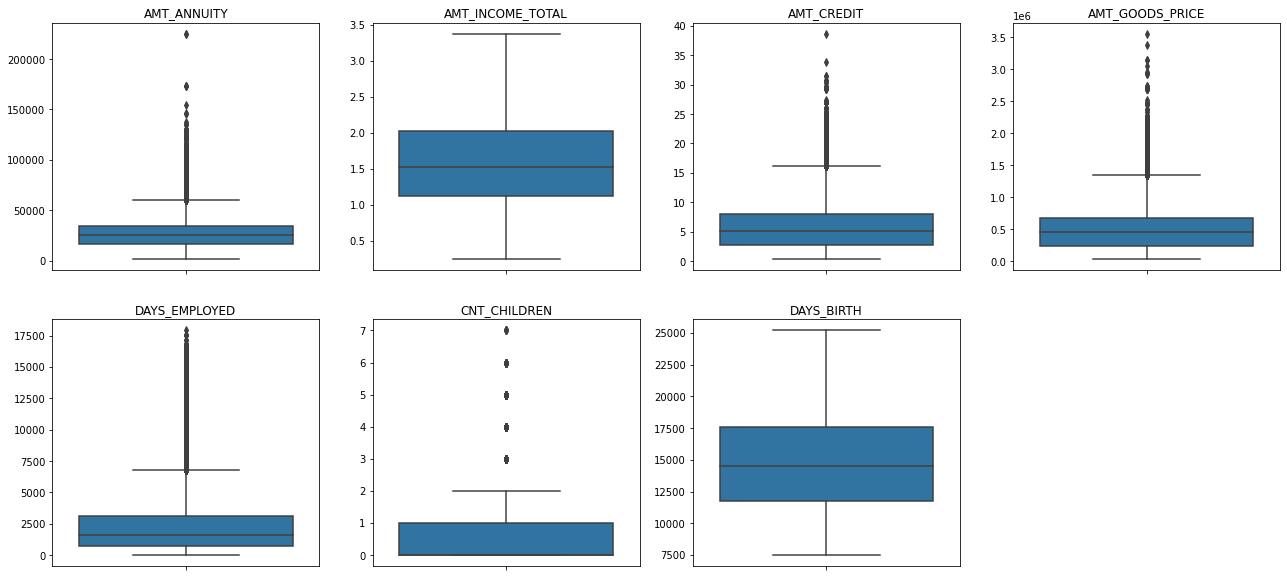

In [827]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Data Analysis
---


## Who are our clients?

In [828]:
df_clients = df[['CODE_GENDER','OCCUPATION_TYPE','AMT_INCOME_TOTAL','AGE','TARGET']]
df_clients.head()

,CODE_GENDER,OCCUPATION_TYPE,AMT_INCOME_TOTAL,AGE,TARGET
0,M,Laborers,2.025,25,1
1,F,Core staff,2.700,45,0
2,M,Laborers,0.675,52,0
3,F,Laborers,1.350,52,0
4,M,Core staff,1.215,54,0


In [829]:
df_clients.groupby(['TARGET']).count()

,CODE_GENDER,OCCUPATION_TYPE,AMT_INCOME_TOTAL,AGE
TARGET,,,,
0,216574,216574,216574,216574
1,20966,20966,20966,20966


array([[<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

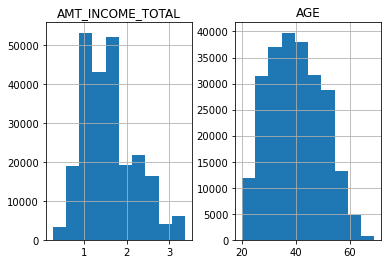

In [830]:
df_clients.hist( ['AMT_INCOME_TOTAL','AGE'])

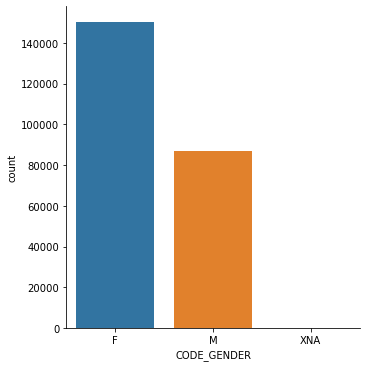

In [831]:
sns.catplot(data=df_clients, kind='count', x='CODE_GENDER')

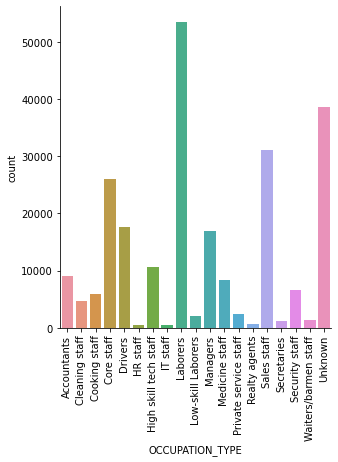

In [832]:
sns.catplot(data=df_clients, kind='count', x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.show()


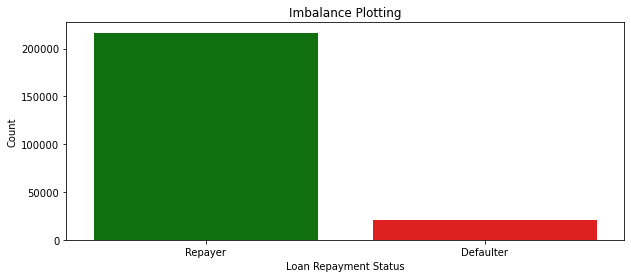

In [833]:
Imbalance = df["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count")
plt.title("Imbalance Plotting")
plt.show()

In [834]:
count_0 = Imbalance.iloc[0]["TARGET"] #defaulter
count_1 = Imbalance.iloc[1]["TARGET"] #repayer
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.17 and 8.83
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 10.33 : 1 (approx)


## Plotting Functions

In [835]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [836]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [837]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on df

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

# Who defaults or has problems repaying loans?
---

### Segmented Univariate Analysis

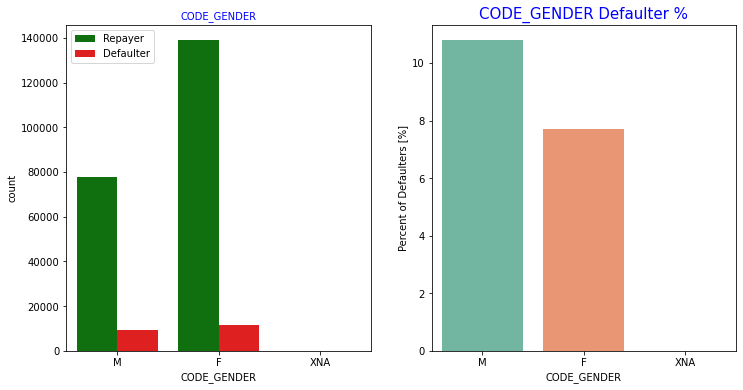

In [838]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

>The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (\~10%), compared to women (\~7%)

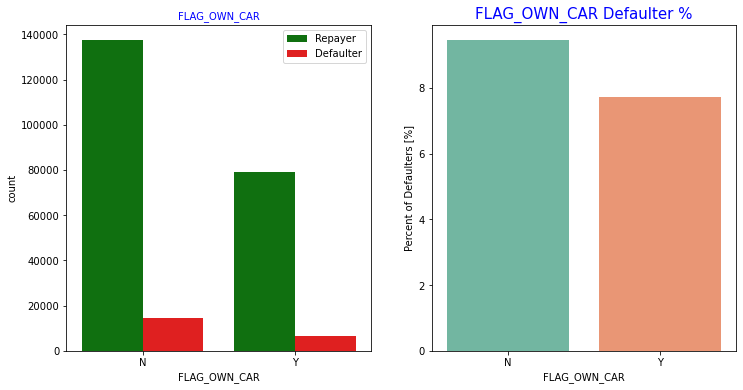

In [839]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

>Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

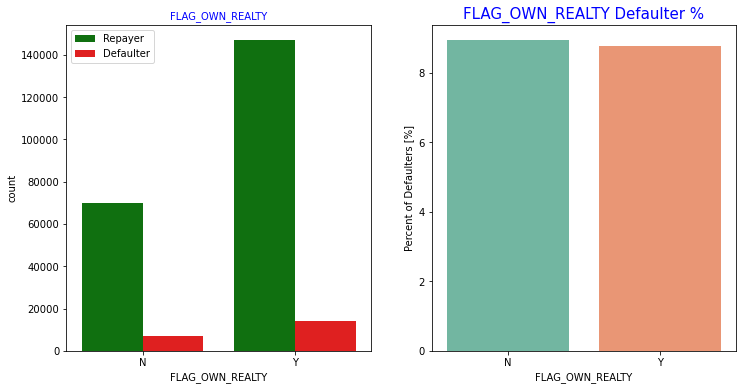

In [840]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

>The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.

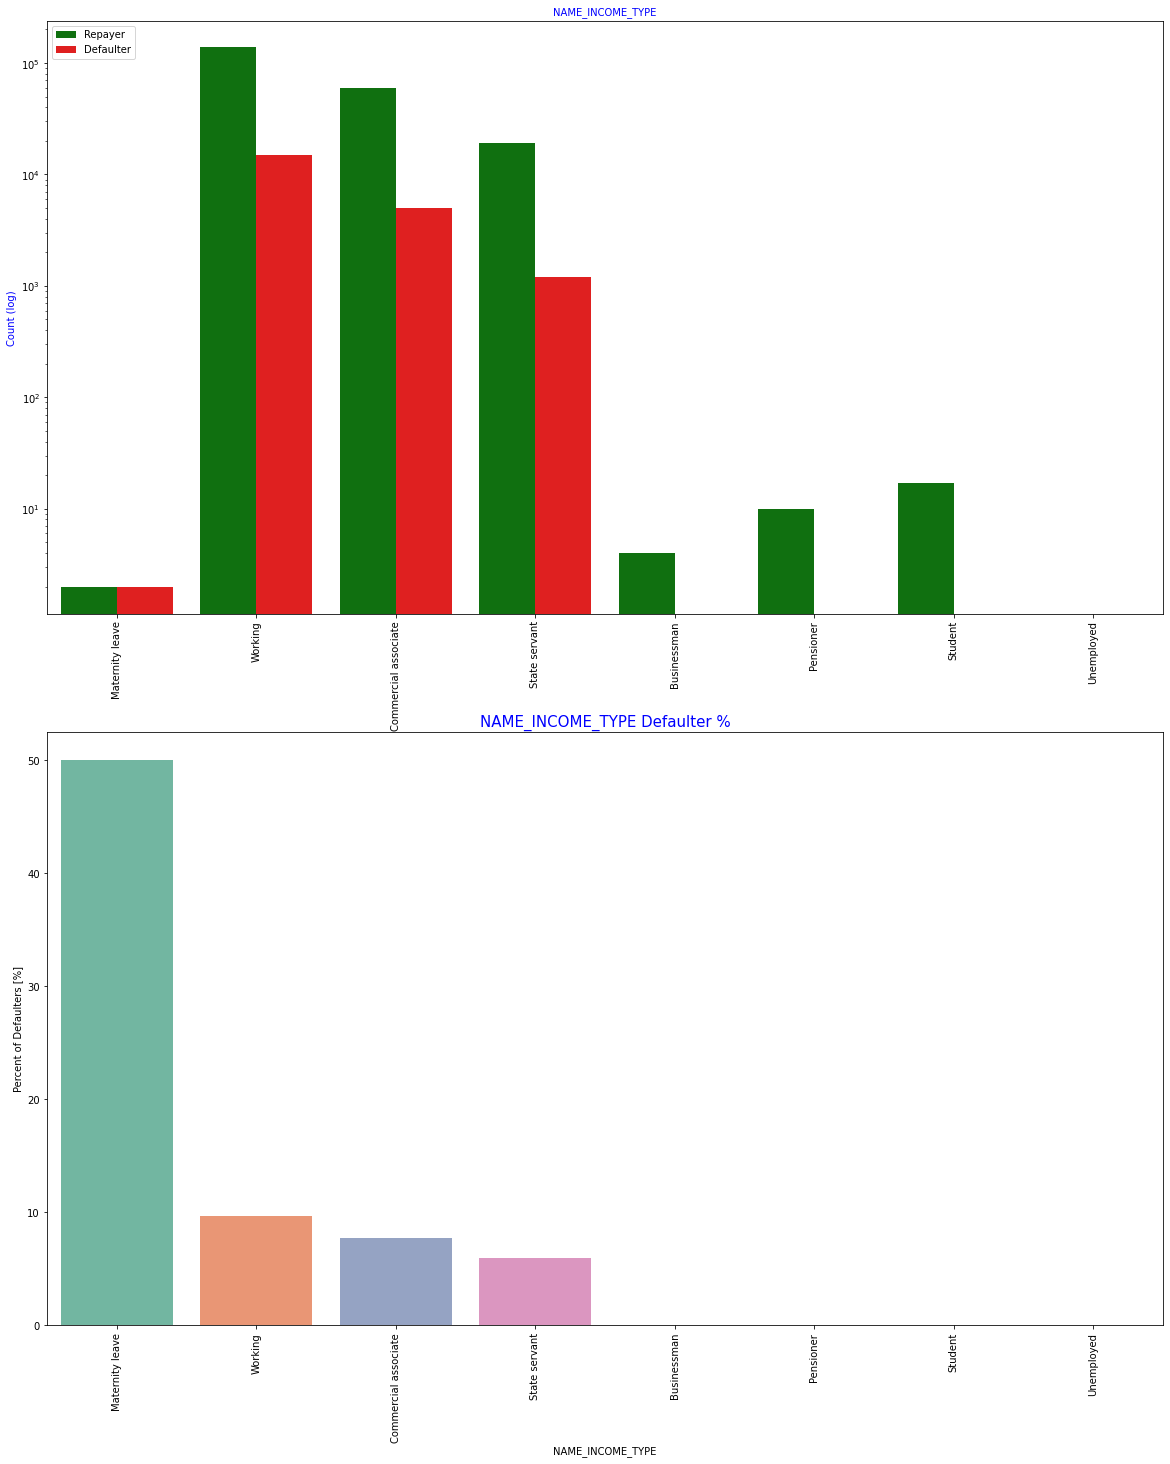

In [841]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

>Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant. <br>
The applicants with the type of income "Maternity leave" have almost 40% ratio of not returning loans, followed by Unemployed (37%). <br> 
The rest of types of incomes are under the average of 10% for not returning loans. <br>
**Student and Businessmen**, though less in numbers do not have any default record. Thus **these two category are safest for providing loans**.

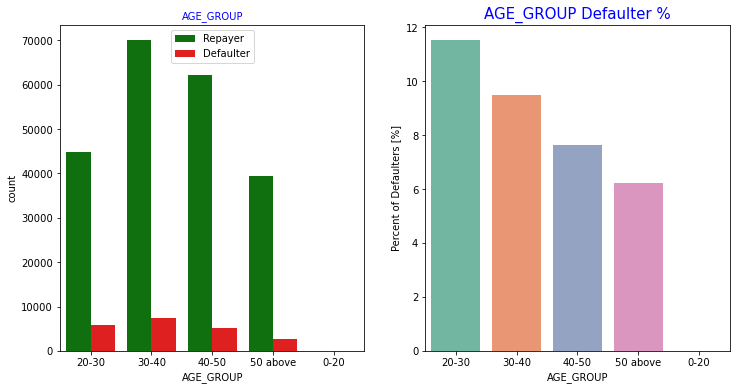

In [842]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

>People in the age group range 20-40 have higher probability of defaulting <br>
People above age of 50 have low probability of defailting 

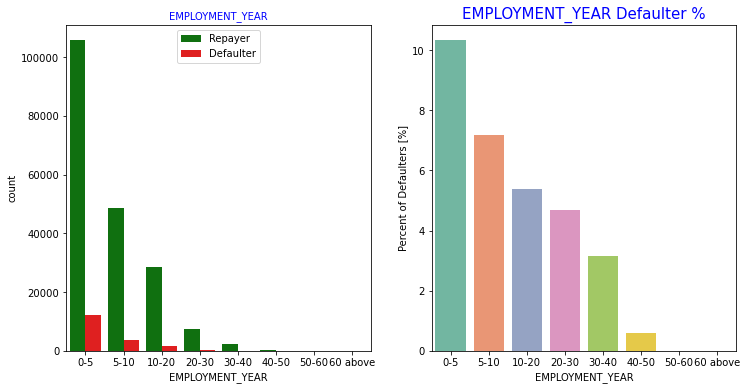

In [843]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

> Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10% <br> 
 With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

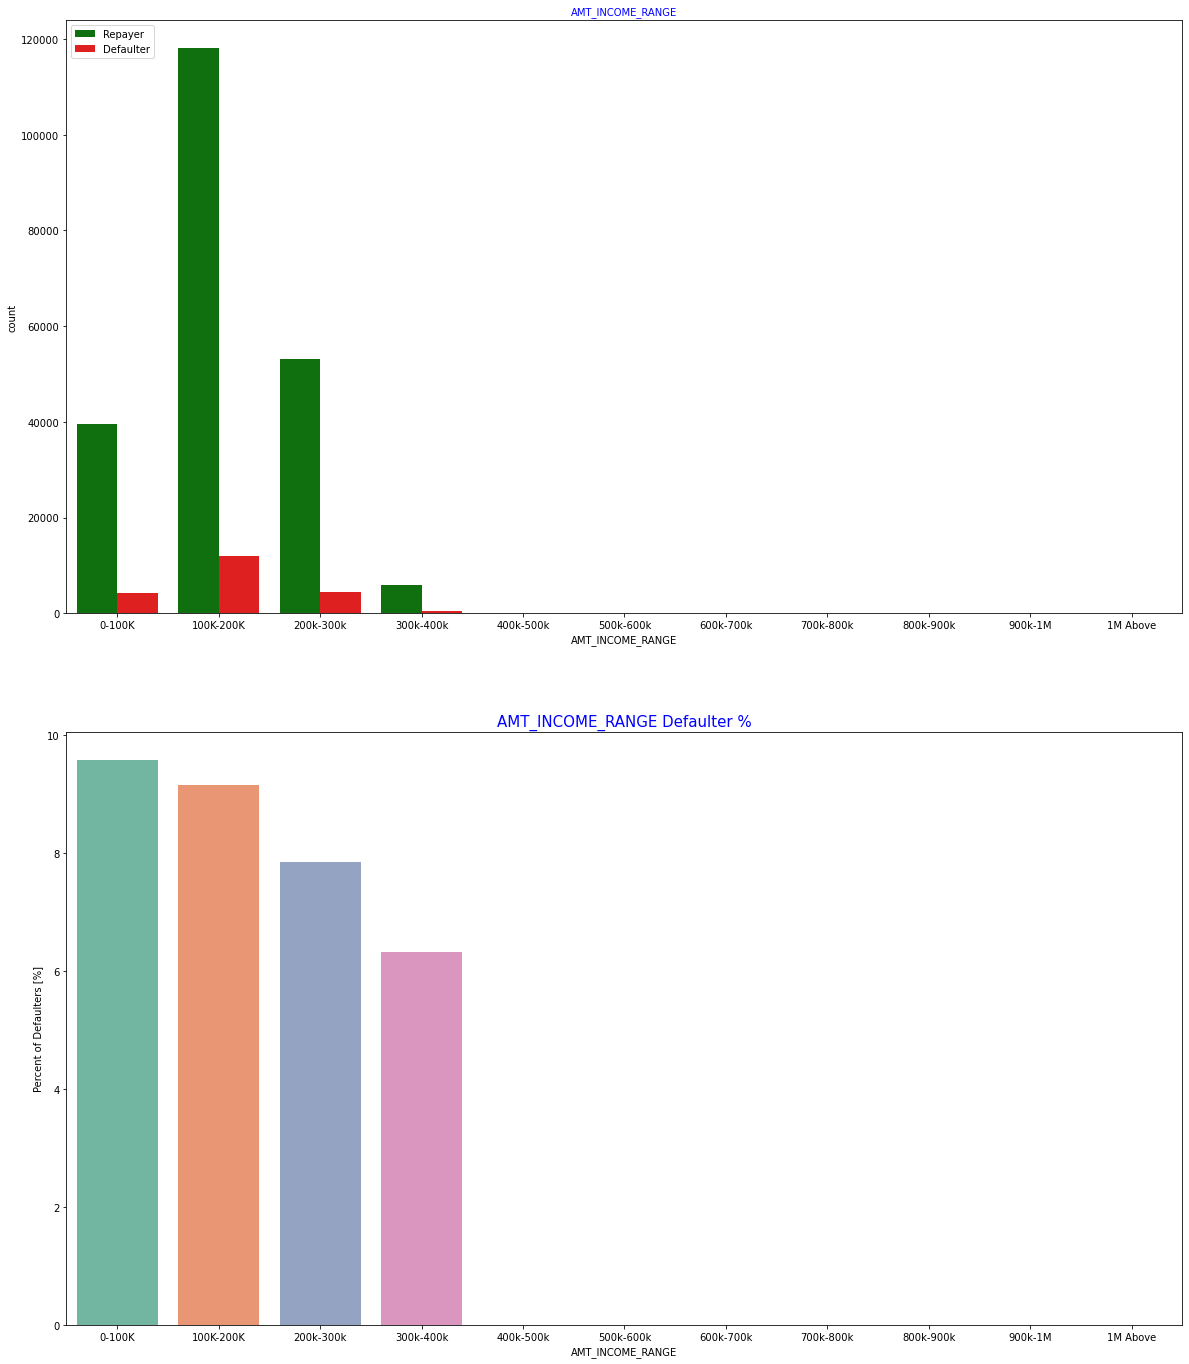

In [844]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

> 90% of the applications have Income total less than 300,000 <br>
Application with Income less than 300,000 has high probability of defaulting <br>
Applicant with Income more than 700,000 are less likely to default

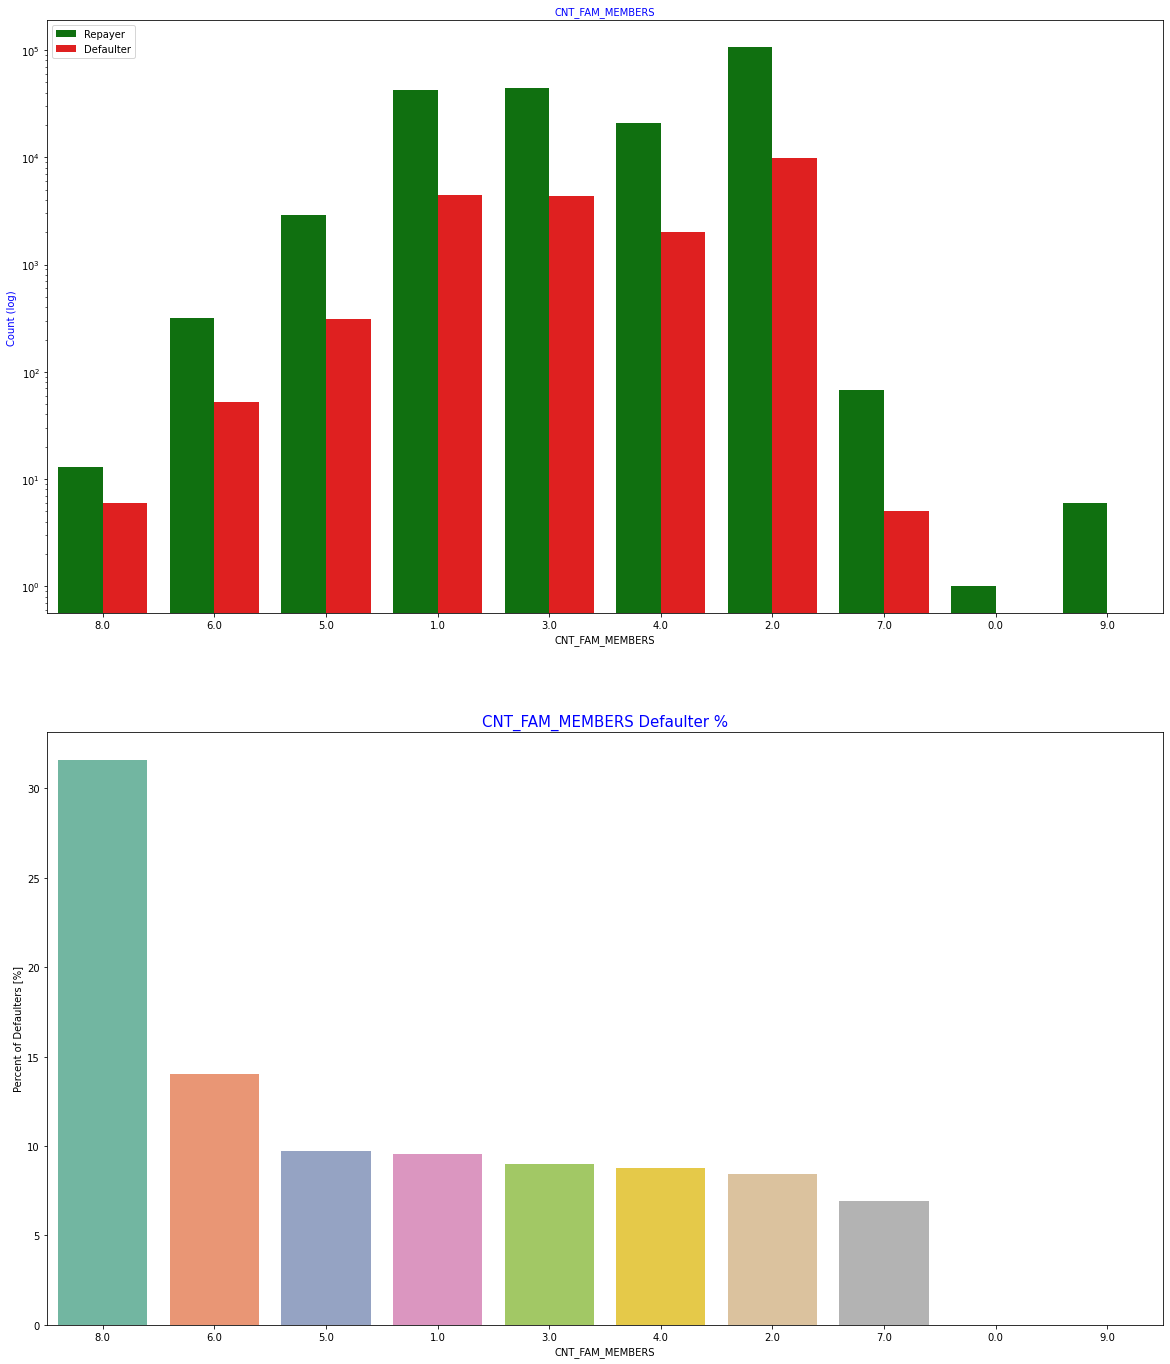

In [845]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

>Family member follows the same trend as children where having more family members increases the risk of defaulting

### Categorical Bi/Multivariate Analysis

In [846]:
df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,4.0,2.025000,0.259808,1.8000,1.800000,2.0250,2.25000,2.250000
Commercial associate,64447.0,1.736551,0.630422,0.2655,1.260000,1.6200,2.25000,3.370500
Maternity leave,4.0,0.855000,0.369256,0.4950,0.630000,0.7875,1.01250,1.350000
Pensioner,10.0,1.109250,0.352747,0.6750,0.815625,0.9900,1.45125,1.575000
State servant,20298.0,1.621107,0.646482,0.2700,1.125000,1.5750,2.02500,3.368359
Student,17.0,1.474412,0.437603,0.8100,1.125000,1.5750,1.75500,2.250000
Unemployed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Working,152760.0,1.516017,0.600047,0.2565,1.125000,1.3500,1.80000,3.330000


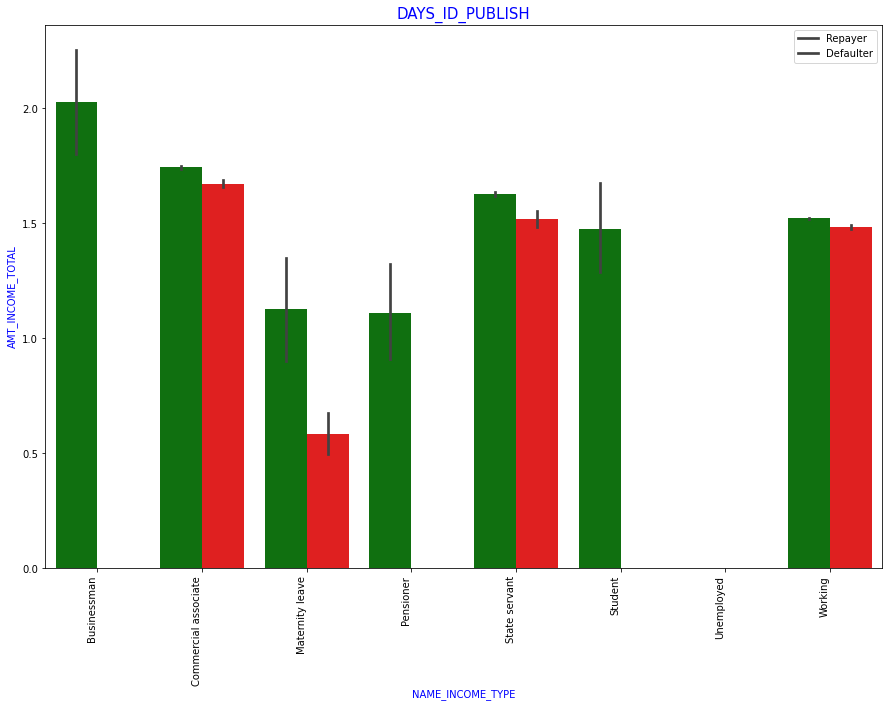

In [847]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df,"TARGET",(15,10))

> It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

## Numeric Variables Analysis

### Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

In [848]:
# Bifurcating the df dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'
                        ]


Repayer_df = df.loc[df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = df.loc[df['TARGET']==1, cols_for_correlation] # Defaulters

 ### Correlation between numeric variable

In [849]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['Feature 1','Feature 2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,Feature 1,Feature 2,Correlation
46,AMT_GOODS_PRICE,AMT_CREDIT,0.985651
99,CNT_FAM_MEMBERS,CNT_CHILDREN,0.892053
47,AMT_GOODS_PRICE,AMT_ANNUITY,0.767716
35,AMT_ANNUITY,AMT_CREDIT,0.766370
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.430517
45,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.364312
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.361895
71,DAYS_EMPLOYED,DAYS_BIRTH,0.354035
82,DAYS_REGISTRATION,DAYS_BIRTH,0.303519
55,DAYS_BIRTH,CNT_CHILDREN,0.245091


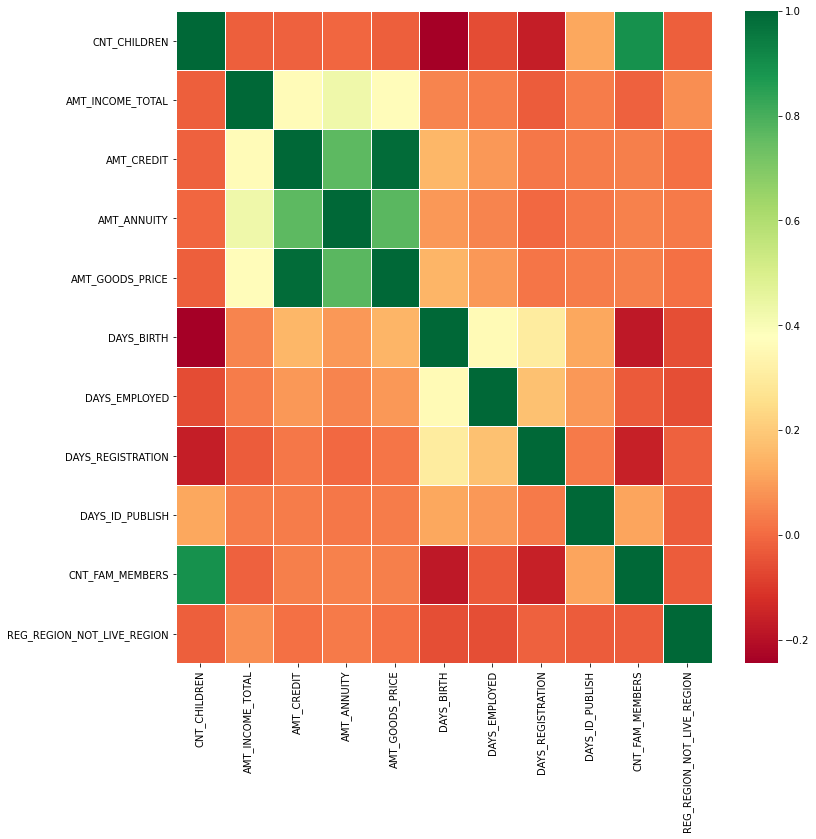

In [850]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

>Correlating factors amongst repayers: <br>
Credit amount is highly correlated with <br>
> 1. amount of goods price <br>
> 2. loan annuity <br>
> 3. total income <br>
>We can also see that repayers have high correlation in number of days employed.

In [851]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['Feature 1','Feature 2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,Feature 1,Feature 2,Correlation
46,AMT_GOODS_PRICE,AMT_CREDIT,0.981551
99,CNT_FAM_MEMBERS,CNT_CHILDREN,0.892275
35,AMT_ANNUITY,AMT_CREDIT,0.747445
47,AMT_GOODS_PRICE,AMT_ANNUITY,0.746554
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.406523
45,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.333694
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.333307
71,DAYS_EMPLOYED,DAYS_BIRTH,0.308688
82,DAYS_REGISTRATION,DAYS_BIRTH,0.242293
57,DAYS_BIRTH,AMT_CREDIT,0.191206


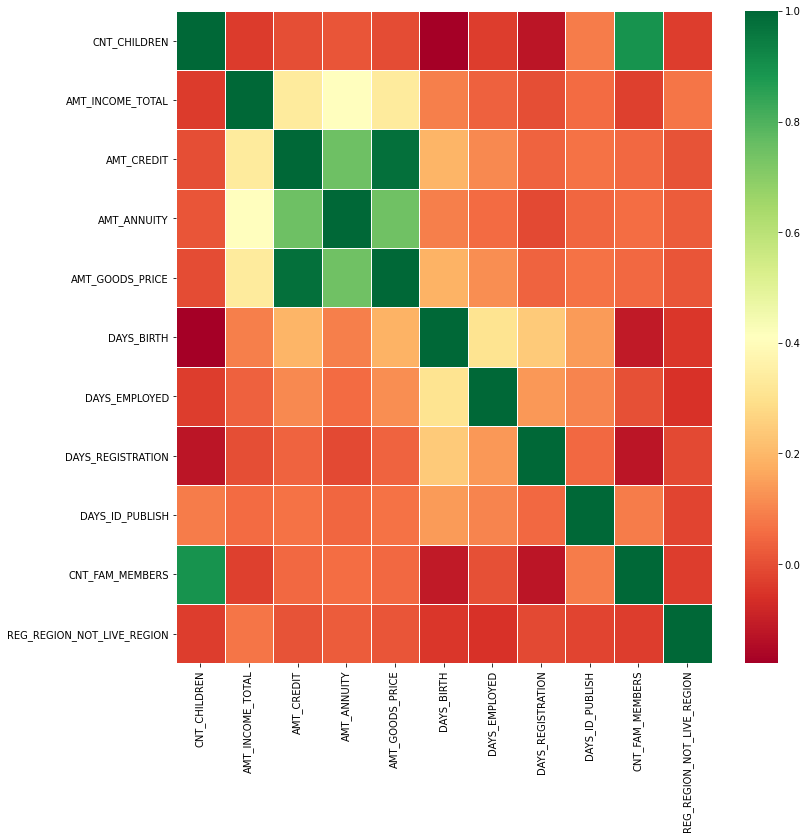

In [852]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

>Credit amount is highly correlated with amount of goods price which is same as repayers. <br>
But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77) <br>
We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58). <br>
There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers. <br>
Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers. <br>
There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254) <br>

### Numerical Univariate Analysis

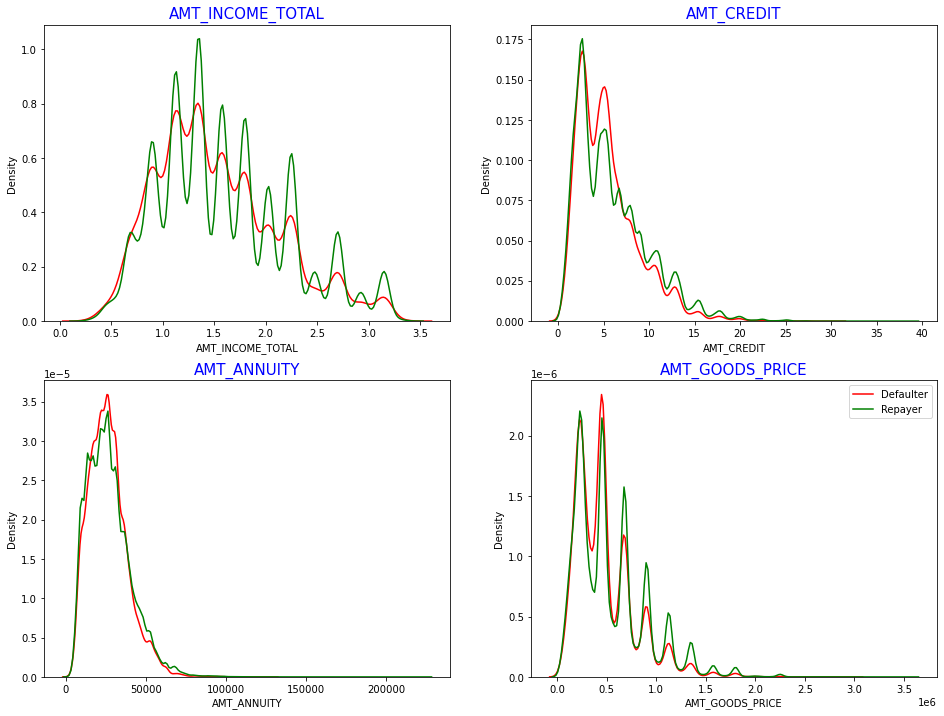

In [853]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

>Most no. of loans are given for goods price below 10 lakhs <br> 
Most people pay annuity below 50000 for the credit loan <br>
Credit amount of the loan is mostly less then 10 lakhs <br>
The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

###  Numerical Bivariate Analysis

<Figure size 1080x432 with 0 Axes>

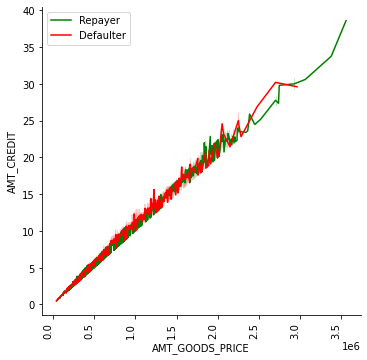

In [854]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',df,"TARGET", "line", ['g','r'], False,(15,6))

>When the credit amount goes beyond 3M, there is an increase in defaulters.

In [855]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
#amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C185AE3550> (for post_execute):


KeyboardInterrupt: 

>When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters <br>
AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line <br>
There are very less defaulters for AMT_CREDIT >3M <br>
Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Conclusions
---

>Decisive factors whether an applicant will be **Repayer**: <br> 
NAME_INCOME_TYPE: Student and Businessmen have no defaults. <br>
DAYS_BIRTH: People above age of 50 have low probability of defaulting <br>
DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate <br>
AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default <br>
CNT_FAM_MEMBERS: People with zero to two children tend to repay the loans. <br>

>Decisive Factor whether an applicant will be **Defaulter**: <br> 
CODE_GENDER: Men are at relatively higher default rate <br>
NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot. <br>
OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge. <br>
DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting. <br>
DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate. <br>
CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected. <br>
AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

# Preparing dataset for Regression
---

In [856]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,0.0,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1,200k-300k,400k-500k,25,20-30,1,0-5
1,100003,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0.0,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0,200k-300k,1M Above,45,40-50,3,0-5
2,100004,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0,0-100K,100K-200K,52,50 above,0,NaN
3,100006,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,0.0,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,100K-200K,300k-400k,52,50 above,8,5-10
4,100007,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,0.0,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0,100K-200K,500k-600k,54,50 above,8,5-10


In [857]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237540 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   237540 non-null  int64   
 1   NAME_CONTRACT_TYPE           237540 non-null  category
 2   CODE_GENDER                  237540 non-null  category
 3   FLAG_OWN_CAR                 237540 non-null  category
 4   FLAG_OWN_REALTY              237540 non-null  category
 5   CNT_CHILDREN                 237540 non-null  int64   
 6   AMT_INCOME_TOTAL             237540 non-null  float64 
 7   AMT_CREDIT                   237540 non-null  float64 
 8   AMT_ANNUITY                  237540 non-null  float64 
 9   AMT_GOODS_PRICE              237540 non-null  float64 
 10  NAME_TYPE_SUITE              237540 non-null  category
 11  NAME_INCOME_TYPE             237540 non-null  category
 12  NAME_EDUCATION_TYPE          237540 non-null

In [858]:
df['CODE_GENDER'].value_counts()

F      150462
M       87074
XNA         4
Name: CODE_GENDER, dtype: int64

In [859]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df.CODE_GENDER)

# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the values
# merged.drop(['CODE_GENDER'], axis='columns', inplace=True)

# # print the dataframe
# merged.head()

In [860]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         213284
Revolving loans     24256
Name: NAME_CONTRACT_TYPE, dtype: int64

In [861]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df.NAME_CONTRACT_TYPE)

# Concatenate the dummies to original dataframe
merged = pd.concat([merged, dummies], axis='columns')

# drop the values
#merged = merged.drop(['NAME_CONTRACT_TYPE'], axis='columns',inplace=True)

# print the dataframe
# merged.head()

In [862]:
merged['FLAG_OWN_CAR'].replace(['N', 'Y'],[0, 1], inplace=True)                 

In [863]:
merged['FLAG_OWN_REALTY'].replace(['N', 'Y'],
                        [0, 1], inplace=True) 

In [864]:
merged.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TARGET,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,F,M,XNA,Cash loans,Revolving loans
0,100002,Cash loans,M,0,1,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,0.0,1,1,0,1,1,0,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,1,200k-300k,400k-500k,25,20-30,1,0-5,0,1,0,1,0
1,100003,Cash loans,F,0,0,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0.0,1,1,0,1,1,0,Core staff,2.0,0,0,0,0,0,0,School,0,200k-300k,1M Above,45,40-50,3,0-5,1,0,0,1,0
2,100004,Revolving loans,M,1,1,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,0,0,0,0,0,0,Government,0,0-100K,100K-200K,52,50 above,0,NaN,0,1,0,0,1
3,100006,Cash loans,F,0,1,0,1.350,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,0.0,1,1,0,1,0,0,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,0,100K-200K,300k-400k,52,50 above,8,5-10,1,0,0,1,0
4,100007,Cash loans,M,0,1,0,1.215,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,0.0,1,1,0,1,0,0,Core staff,1.0,0,0,0,0,1,1,Religion,0,100K-200K,500k-600k,54,50 above,8,5-10,0,1,0,1,0


In [865]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df.OCCUPATION_TYPE)

# Concatenate the dummies to original dataframe
merged = pd.concat([merged, dummies], axis='columns')

# # drop the values
# merged = merged.drop(['OCCUPATION_TYPE'], axis='columns')

# # print the dataframe
# merged.head()

In [866]:
merged.drop(['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE' ,'NAME_FAMILY_STATUS' ,'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','AMT_INCOME_RANGE','AMT_CREDIT_RANGE','AGE_GROUP','EMPLOYMENT_YEAR'],axis='columns',inplace=True)

In [867]:
merged.head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,AGE,YEARS_EMPLOYED,F,M,XNA,Cash loans,Revolving loans,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Unknown
0,100002,0,1,0,2.025,4.065975,24700.5,351000.0,9461,637,3648.0,2120,0.0,1,1,0,1,1,0,1.0,0,0,0,0,0,0,1,25,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,2.700,12.935025,35698.5,1129500.0,16765,1188,1186.0,291,0.0,1,1,0,1,1,0,2.0,0,0,0,0,0,0,0,45,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,1,1,0,0.675,1.350000,6750.0,135000.0,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,1.0,0,0,0,0,0,0,0,52,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,100006,0,1,0,1.350,3.126825,29686.5,297000.0,19005,3039,9833.0,2437,0.0,1,1,0,1,0,0,2.0,0,0,0,0,0,0,0,52,8,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,100007,0,1,0,1.215,5.130000,21865.5,513000.0,19932,3038,4311.0,3458,0.0,1,1,0,1,0,0,1.0,0,0,0,0,1,1,0,54,8,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [868]:
merged.isnull().any()

SK_ID_CURR                     False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
AMT_GOODS_PRICE                False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
OWN_CAR_AGE                    False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
REG_CITY_NOT_LIVE_CITY         False
REG_CITY_NOT_WORK_CITY         False
LIVE_CITY_NOT_WORK_CITY        False
TARGET                         False
A

# Logistic Regression
---

In [869]:
X= merged

In [870]:
X= X.drop(['TARGET'],axis=1)

In [871]:
y = merged['TARGET']

In [872]:
lr = LogisticRegression()

In [873]:
lr.fit(X,y)

LogisticRegression()

In [874]:
lr.score(X,y)

0.9117369706154753

In [875]:
pred_test = lr.predict(X)

In [876]:
print(metrics.confusion_matrix(y, pred_test))

[[216574      0]
 [ 20966      0]]


In [877]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y,pred_test),  
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0  216574       0
actual:1   20966       0


In [878]:
merged.head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,AGE,YEARS_EMPLOYED,F,M,XNA,Cash loans,Revolving loans,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Unknown
0,100002,0,1,0,2.025,4.065975,24700.5,351000.0,9461,637,3648.0,2120,0.0,1,1,0,1,1,0,1.0,0,0,0,0,0,0,1,25,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,2.700,12.935025,35698.5,1129500.0,16765,1188,1186.0,291,0.0,1,1,0,1,1,0,2.0,0,0,0,0,0,0,0,45,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,1,1,0,0.675,1.350000,6750.0,135000.0,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,1.0,0,0,0,0,0,0,0,52,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,100006,0,1,0,1.350,3.126825,29686.5,297000.0,19005,3039,9833.0,2437,0.0,1,1,0,1,0,0,2.0,0,0,0,0,0,0,0,52,8,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,100007,0,1,0,1.215,5.130000,21865.5,513000.0,19932,3038,4311.0,3458,0.0,1,1,0,1,0,0,1.0,0,0,0,0,1,1,0,54,8,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [879]:
#split dataset in features and target variable
feature_cols = ['AMT_INCOME_TOTAL', 'YEARS_EMPLOYED','CNT_FAM_MEMBERS','Accountants','Cleaning staff','Cooking staff','Drivers','HR staff','High skill tech staff','IT staff']
X = merged[feature_cols] # Features
y = merged.TARGET # Target variable

In [880]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

In [881]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [882]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[54112,     0],
       [ 5273,     0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

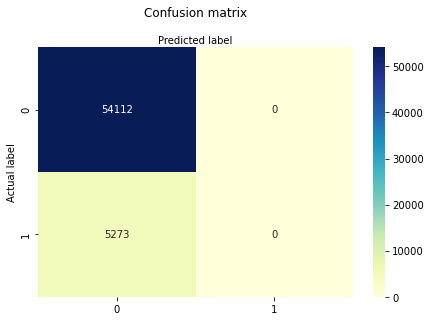

In [883]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [884]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9112065336364402
Precision: 0.0
Recall: 0.0
